# Tokenizers
- Are dictionaries that are trained separately by their own models
- 4 popular models viz. 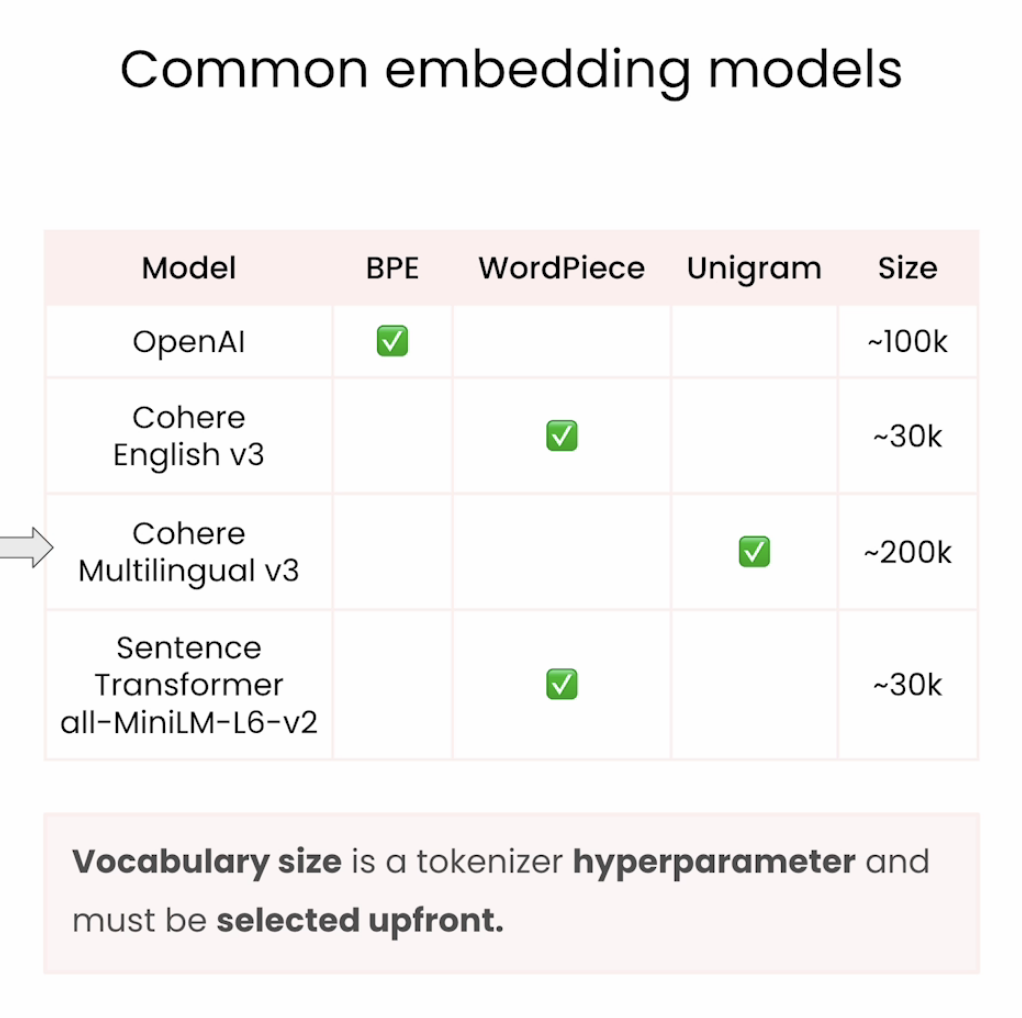
- There are generally at least 30k+ size and it is a hyperparameter we choose during training

In [1]:
import warnings
warnings.filterwarnings('ignore')

training_data = [
    "walker walked a long walk",
]

# BPE - Byte-Pair Encoding

- Words are usually split by whitespace characters and then dividied into characters or bytes
- At each step we merge two tokens which are the most frequent pair (but we don't delete any previous ones)
- Process continues until we reach the `specified vocabulary size`
- If we choose 14 as size, below is the output

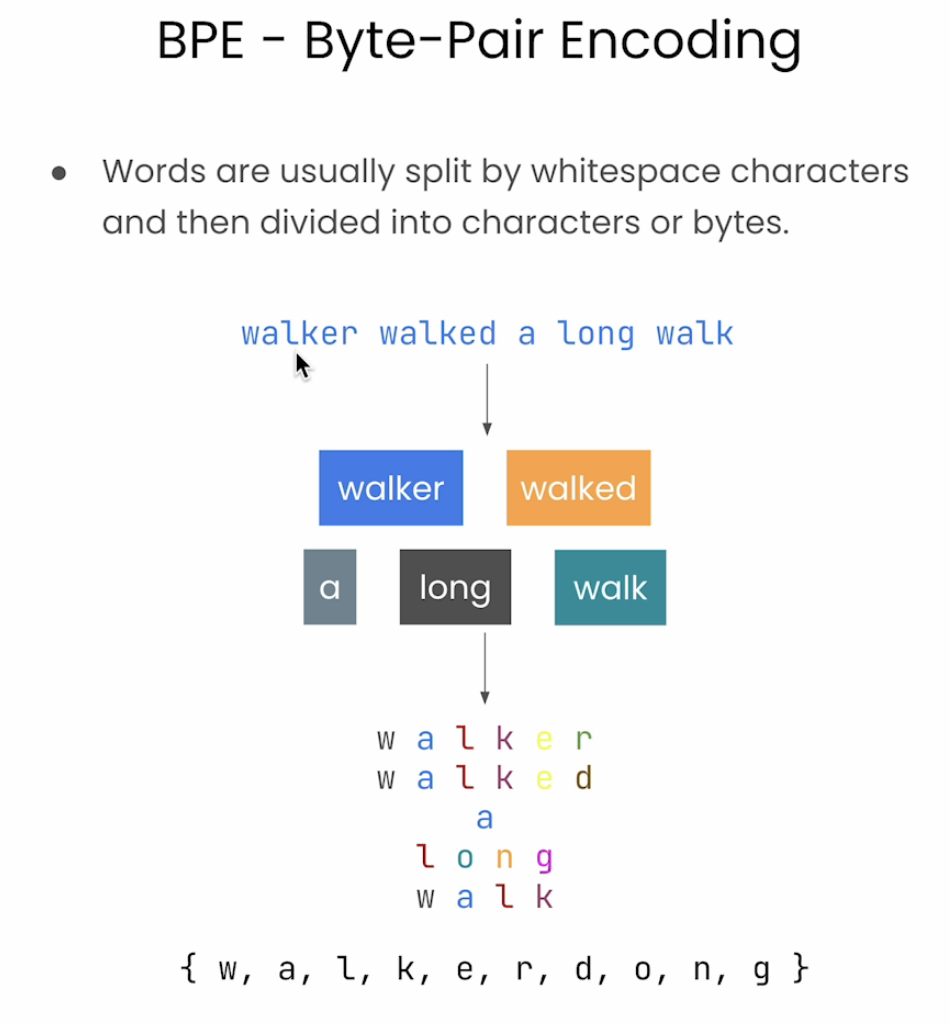
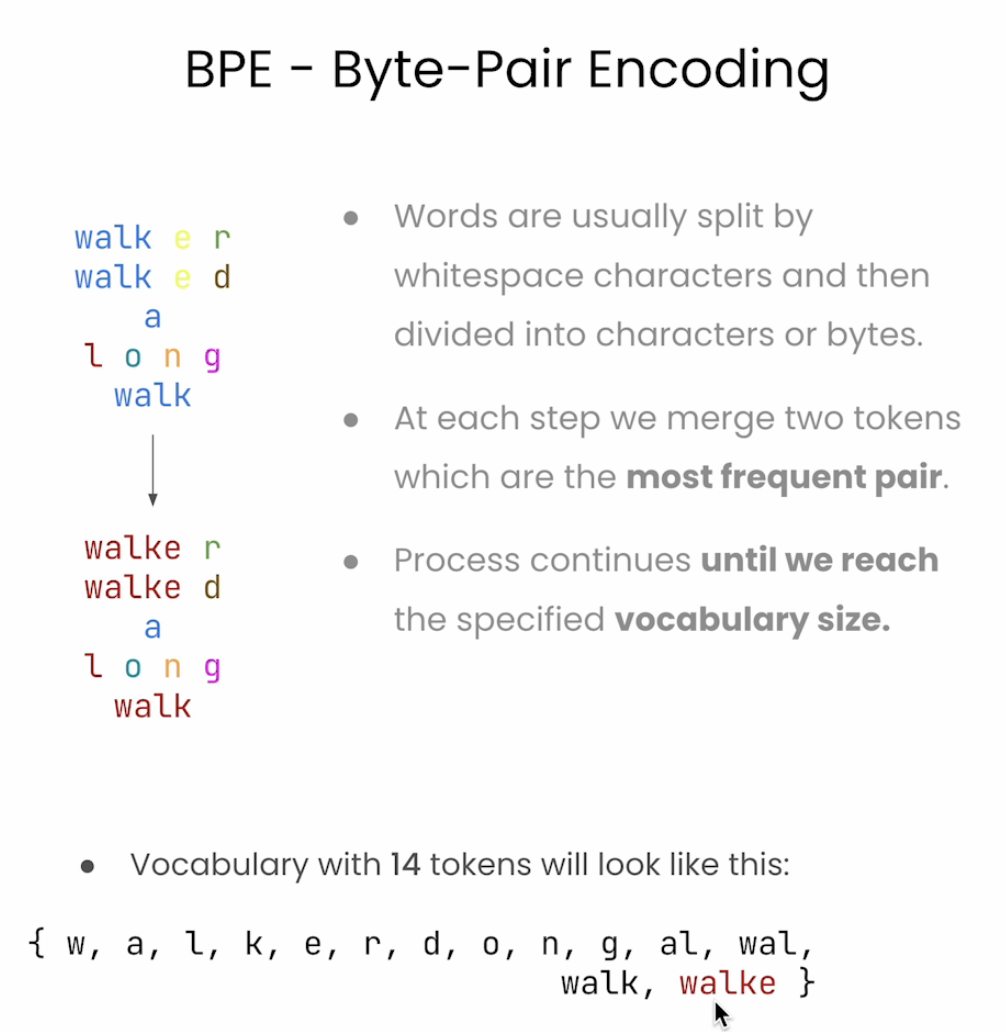

In [3]:
from tokenizers.trainers import BpeTrainer
from tokenizers.models import BPE
from tokenizers import Tokenizer
from tokenizers.pre_tokenizers import Whitespace

bpe_tokenizer = Tokenizer(BPE())
bpe_tokenizer.pre_tokenizer = Whitespace()

bpe_trainer = BpeTrainer(vocab_size=14)

In [4]:
bpe_tokenizer.train_from_iterator(training_data, bpe_trainer)

In [5]:
bpe_tokenizer.get_vocab()

{'wal': 11,
 'e': 2,
 'o': 7,
 'a': 0,
 'l': 5,
 'r': 8,
 'd': 1,
 'g': 3,
 'w': 9,
 'al': 10,
 'walk': 12,
 'walke': 13,
 'n': 6,
 'k': 4}

In [6]:
bpe_tokenizer.encode("walker walked a long walk").tokens

['walke', 'r', 'walke', 'd', 'a', 'l', 'o', 'n', 'g', 'walk']

In [7]:
bpe_tokenizer.encode("wlk").ids

[9, 5, 4]

In [8]:
bpe_tokenizer.encode("wlk").tokens

['w', 'l', 'k']

# Unknown words
- are just ommitted

In [9]:
bpe_tokenizer.encode("she walked").tokens

['e', 'walke', 'd']

# WordPiece

- The general intuition is to learn word prefix and suffix - as those don't change the meaning of word entirely.
- For e.g. walked, walking, walk mean the same. So a token for the word and then a token for `tense` should capture the meaning 
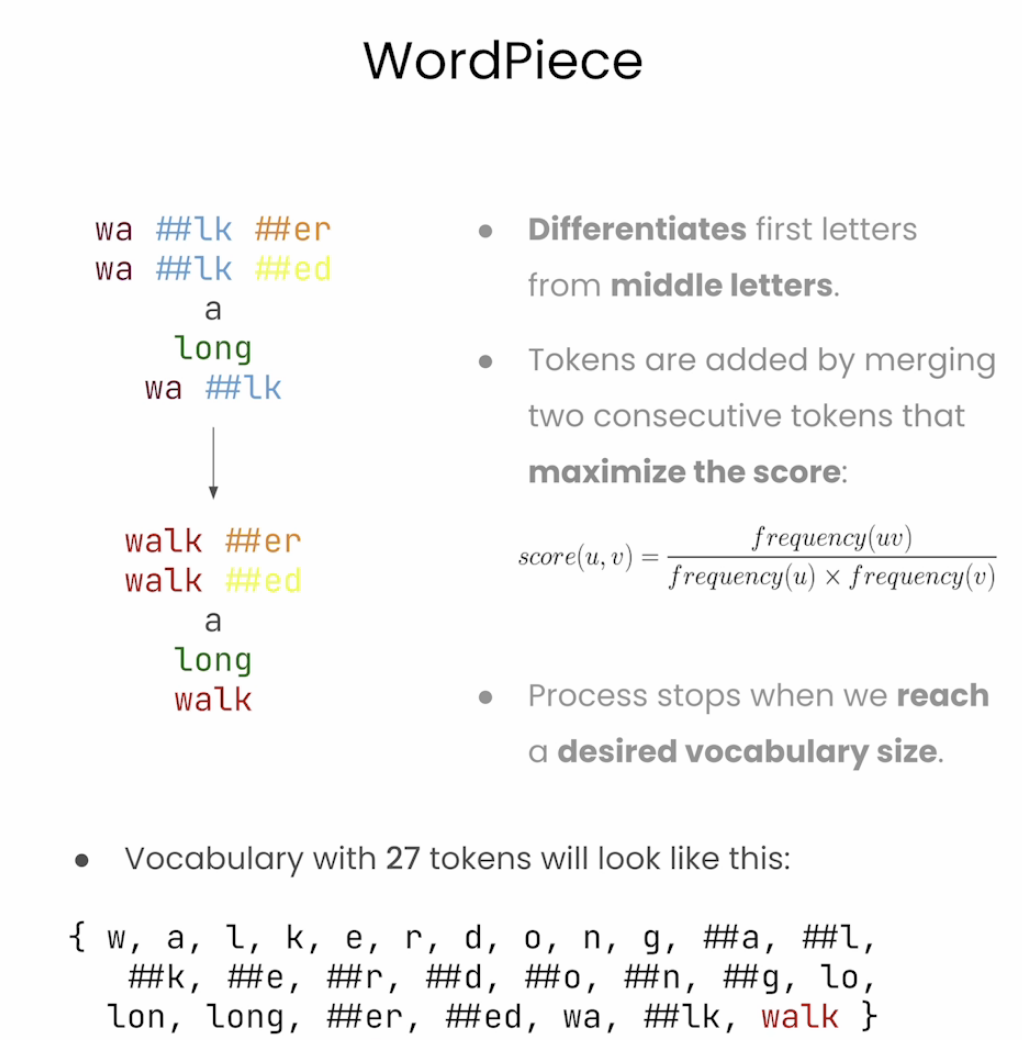

# Unigram

- Initially there will be too many unigram tokens
- So this is a pruning method. It calculates the loss by removing tokens from the vocabulary. Removes the ones that affect the least
- This is quite a heavy computation process
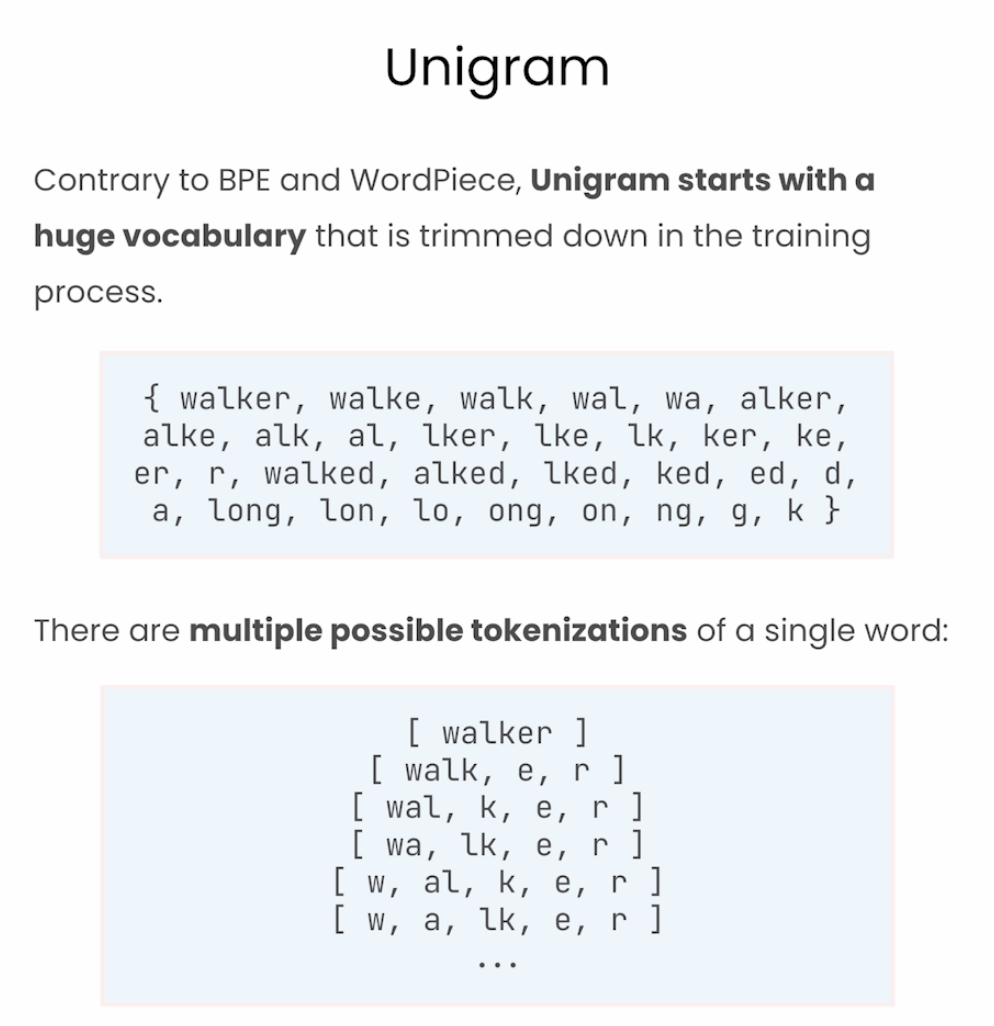


# Sentence Pair
- Where spaces themselves have meaning , this tokenization is the best
- Coding for e.g. python cares about 4 indents vs. 8 
- Also some use cases like `San Francisco` has space and it is together (though rare)
- In such use cases, sentence pair helps

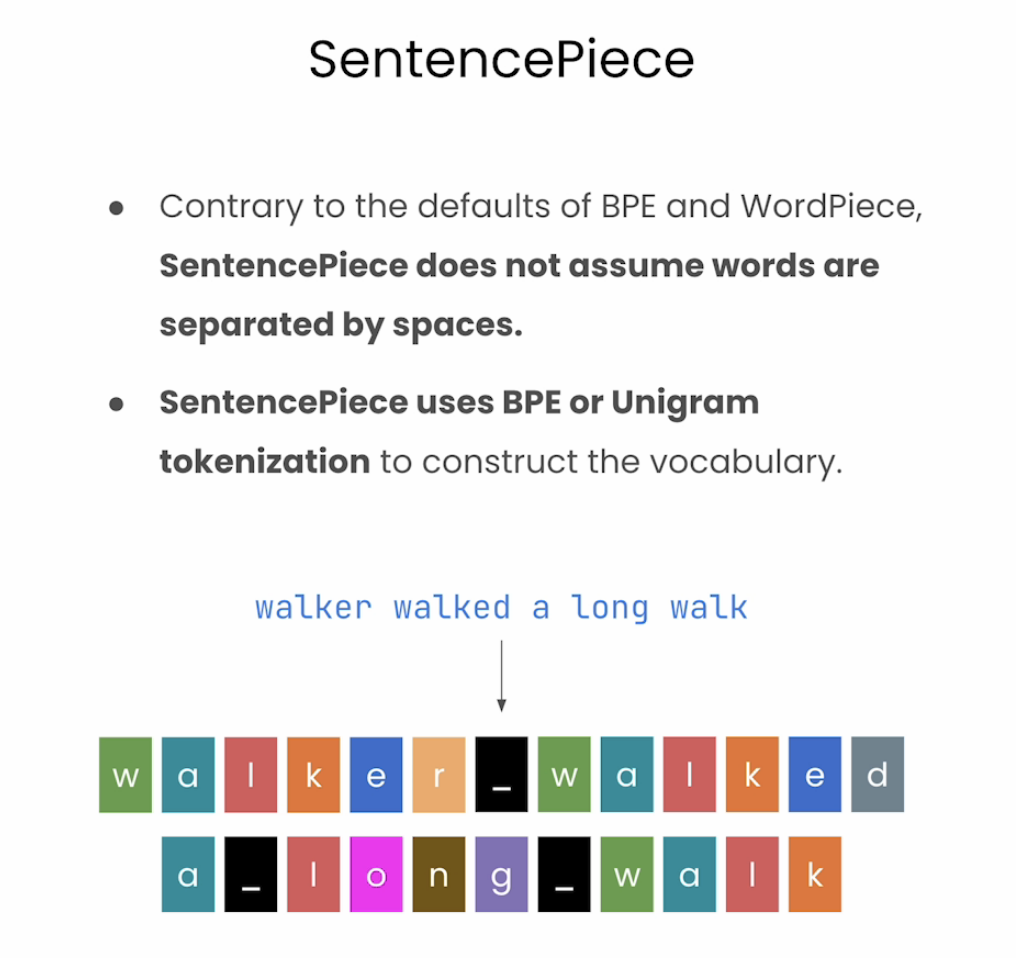